## Deutcshe Algorithm :
it is one of the algorithm which is deterministic in nature
is one of the first quantum algorithms, demonstrating the power of quantum computing to solve specific problems faster than classical methods. It determines whether a given Boolean function 
f(x), defined as 
𝑓:{0,1}→{0,1}, is either constant (producing the same output for all inputs) or balanced (producing different outputs for different inputs) with a single evaluation of the function.



**How querying works in Deutsch's Algorithm**:


in deutsch algorithm querying refers to how quantum system interacts with the oracle function to obtain the information about the behavior without evaluating the function classically. The main  goal of the Deutsch algorithm is to determine whether the function 
f(x) is constant or balanced using fewer queries than a classical approach would require.

1. **Superposition**: Instead of querying $ f(0) $ and $ f(1) $ one after the other, we create a **superposition** of both input states simultaneously. By applying a Hadamard gate to the first qubit, we create a state that effectively represents both 0 and 1 at the same time:
   
   $
   \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
   $

2. **Quantum Oracle**: The next step involves applying a quantum **oracle** that encodes the function $ f(x) $. This oracle uses the superposition state and evaluates the function on both inputs at once. The result of the oracle is stored in an auxiliary qubit.

3. **Interference**: After querying the oracle, we apply another Hadamard transformation. This causes interference between the possible outcomes. The nature of this interference depends on whether $ f $ is constant or balanced, which allows us to distinguish between the two by measuring the first qubit. 

   - If the first qubit measures $ |0\rangle $,  the function is constant.
   - If the first qubit measures $ |1\rangle $, the function is balanced.

The quantum query is performed **once**, but because of the superposition and interference, it effectively handles both input queries in parallel. This is why Deutsch's Algorithm is more efficient: it solves the problem with only a single query to the oracle, whereas classically, we would need two.

By this approach, quantum computing demonstrates a more optimal way of querying functions, taking advantage of quantum parallelism to reduce the number of steps required to solve the problem.

In [1]:
from qiskit import QuantumCircuit ,transpile
from qiskit_aer import AerSimulator

Query gate for f1:


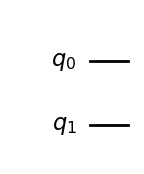

Query gate for f2:


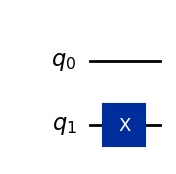

Query gate for f3:


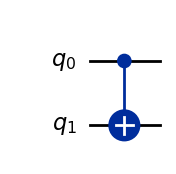

Query gate for f4:


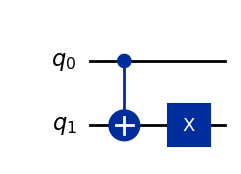

In [2]:
# defining the Query gates
def deutsch_function(f):
    
    oracle=QuantumCircuit(2)

    if f=="f1":
        # f1(x) = 0 -> Identity (no gates needed)
        pass

    elif f == "f2":
        # f2(x) = 1 -> Apply X gate to the second qubit
        oracle.x(1)
    elif f == "f3":
        # f3(x) = x -> Apply CNOT gate (x -> y)
        oracle.cx(0, 1)
    elif f == "f4":
        # f4(x) = not(x) -> Apply CNOT + X gate
        oracle.cx(0, 1)
        oracle.x(1)
    else:
        raise ValueError("Invalid function. Choose 'f1', 'f2', 'f3', or 'f4'.")
    
    return oracle

functions = ["f1", "f2", "f3", "f4"]

for f in functions:
    qc = deutsch_function(f)
    print(f"Query gate for {f}:")
    display(qc.draw("mpl"))

    


in the above circuit f1 and f2 are constant 
and f2 and f3 are balanced 

for a function to be constant 
say f1(x)=0  at x=0 fx=0 ,similarly x=1 fx=0 and vice versa

similary for a function to be balanced 
f(x)=x at x=0 f(x)=0 and x=1 f(x)=1 
and f(x)= x⊕1 at x=0 f(x)=1 and at x=1 f(x)=0

In [3]:
def deutsch_circuit(f):
    """
    Constructs the Deutsch circuit for the given function f.
    """
    # Create a 2-qubit quantum circuit with 1 classical bit for measurement
    qc = QuantumCircuit(2, 1)

    #  Initialize the auxiliary qubit to |1>
    qc.x(1)
    #  Apply Hadamard gates to all qubits
    qc.h(range(2))
    # Step 3: Add the oracle (query gate)
    oracle = deutsch_function(f)
    qc.compose(oracle, inplace=True)
    #  Apply Hadamard gate to the first qubit
    qc.h(0)
    #  Measure the first qubit
    qc.measure(0, 0)
    return qc


In [4]:
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
def deutsch_algorithm(f):
    qc=deutsch_circuit(f)
    sim=AerSimulator()

    # Transpile and run the circuit on the simulator
    compiled_circuit=transpile(qc,sim)
    result = sim.run(compiled_circuit).result()


    #retrieve the measurement 
    counts = result.get_counts(qc)
    output=list(counts.keys())[0]


    # circuit display
    print("Circuit:")
    print(qc)


    display(qc.draw("mpl"))
    plt.show()

    print("\nMeasurement Result:", counts)

    # Interpret the result
   # result
    if '0' in counts:
        print("The function is CONSTANT")
    else:
        print("The function is BALANCED")



### Explanation:

1. **Oracle** or **Function Type**:
   - `constant_0`: Represents $ f(x) = 0 $, i.e., a constant function where $ f(0) = f(1) = 0 $.
   - `constant_1`: Represents $ f(x) = 1 $, i.e., a constant function where $ f(0) = f(1) = 1 $.
   - `balanced_identity`: Represents $ f(x) = x $, i.e., a balanced function where $ f(0) = 0 $ and $ f(1) = 1 $.
   - `balanced_negation`: Represents $ f(x) = \neg x $, i.e., a balanced function where $ f(0) = 1 $ and $ f(1) = 0 $.

2. **Circuit Flow**:
   - Step 1: Initialize the second qubit to $ |1\rangle $ and apply Hadamard gates to create superpositions.
   - Step 2: Apply the oracle to modify the qubits based on the function $ f $.
   - Step 3: Apply another Hadamard gate to the first qubit, which will cause constructive or destructive interference depending on whether the function is constant or balanced.
   - Step 4: Measure the first qubit to determine the result. If the measurement is $ 0 $, the function is constant. If the measurement is $ 1 $, the function is balanced.

Circuit:
     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ H ├┤M├
     ├───┤├───┤└╥┘
q_1: ┤ X ├┤ H ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0 


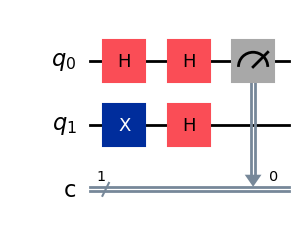


Measurement Result: {'0': 1024}
The function is CONSTANT
Function f1 is None
Circuit:
     ┌───┐┌───┐     ┌─┐
q_0: ┤ H ├┤ H ├─────┤M├
     ├───┤├───┤┌───┐└╥┘
q_1: ┤ X ├┤ H ├┤ X ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 


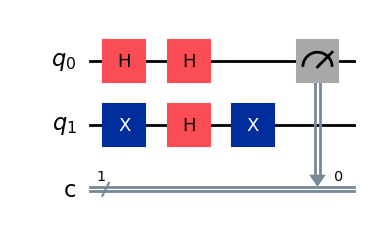


Measurement Result: {'0': 1024}
The function is CONSTANT
Function f2 is None
Circuit:
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


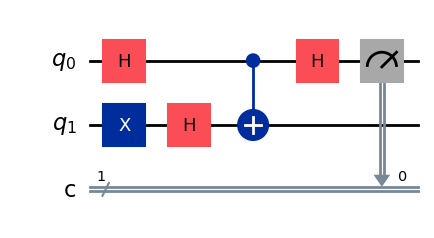


Measurement Result: {'1': 1024}
The function is BALANCED
Function f3 is None
Circuit:
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐├───┤└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├─╫─
     └───┘└───┘└───┘└───┘ ║ 
c: 1/═════════════════════╩═
                          0 


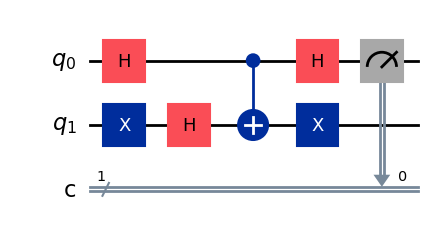


Measurement Result: {'1': 1024}
The function is BALANCED
Function f4 is None


In [5]:
# Test the algorithm
functions = ["f1", "f2", "f3", "f4"]
for f in functions:
    print(f"Function {f} is {deutsch_algorithm(f)}")

Circuit:
     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ H ├┤M├
     ├───┤├───┤└╥┘
q_1: ┤ X ├┤ H ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0 


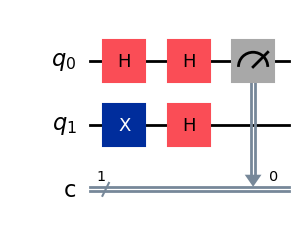


Measurement Result: {'0': 1024}
The function is CONSTANT


In [6]:
deutsch_algorithm("f1")

Circuit:
     ┌───┐┌───┐     ┌─┐
q_0: ┤ H ├┤ H ├─────┤M├
     ├───┤├───┤┌───┐└╥┘
q_1: ┤ X ├┤ H ├┤ X ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 


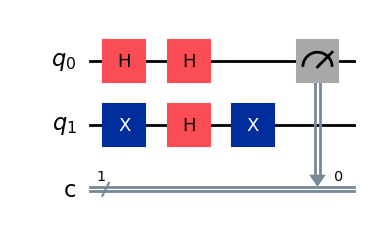


Measurement Result: {'0': 1024}
The function is CONSTANT


In [7]:
deutsch_algorithm("f2")

Circuit:
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


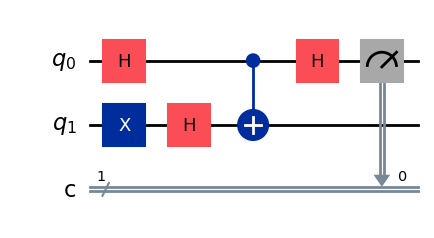


Measurement Result: {'1': 1024}
The function is BALANCED


In [8]:
deutsch_algorithm("f3")

Circuit:
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐├───┤└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├─╫─
     └───┘└───┘└───┘└───┘ ║ 
c: 1/═════════════════════╩═
                          0 


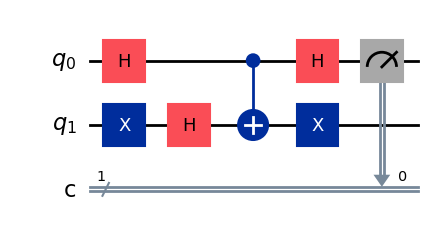


Measurement Result: {'1': 1024}
The function is BALANCED


In [9]:
deutsch_algorithm("f4")